# Pymaceuticals Inc.
---

### Analysis

- From the data provided, you can draw the conclusion that Capomulin is performing better than the other treatments listed. I was able to see the following:
- Capomulin and Ramicane had similar results with average tumor volume, before and after treatment. They both had the lowest average tumor volume vs. the rest of the treatments and they both had the highest number of observed mouse timepoints.
- You can see sepcifically for Capomulin, there is a correlation with mouse weight. Higher weight had, on average, a higher tumor volume.
- Placebo had a lower average of tumor volume vs. Naftisol and Ketapril, who had the largest, and all with similar number of observed mouse timepoints.
- No correlation was identified with the gender of the mouse, with male sitting at 51% and female at 49%.
- If more visualations were conducted, there may be some potential to identify some correlations between age and weight of the mouse and the rest of the treatments performance. 
 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = study_results.join(mouse_metadata.set_index('Mouse ID'), on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [120]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [121]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
if not duplicate_mice.empty:
    print("Data associated with duplicate mouse ID:")
duplicate_mice.head(20)


Data associated with duplicate mouse ID:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [123]:
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [127]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = clean_combined_data["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats.head(20)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print("Tumor Volume (mm3)")
summary_stats_agg.head(20)

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

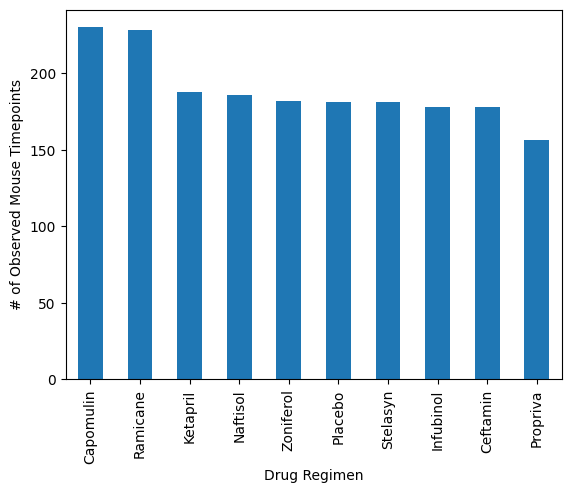

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_pandas = cleaned_data['Drug Regimen'].value_counts().plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

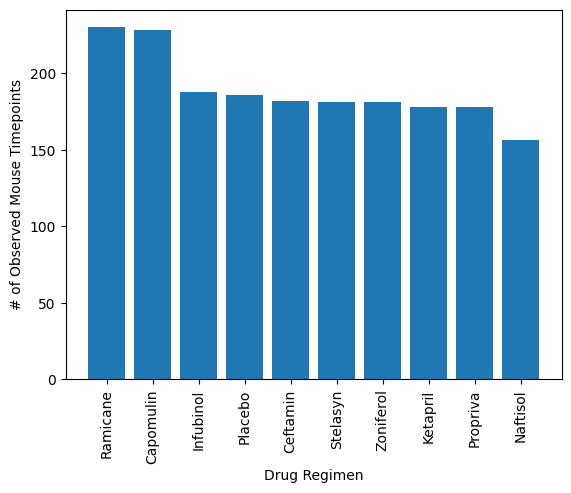

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(cleaned_data['Drug Regimen'].unique(), cleaned_data['Drug Regimen'].value_counts())
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

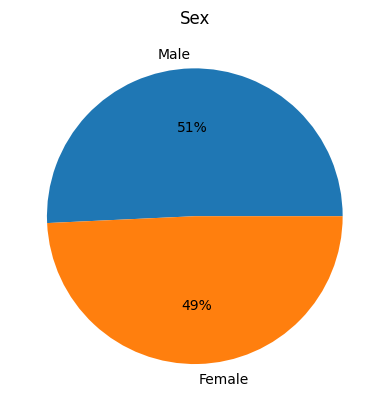

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data['Sex'].value_counts()
total_count = sex_counts.sum()
percentages = (sex_counts / total_count * 100).round()
pie_plot_pandas = sex_counts.plot(kind='pie', autopct=lambda p: '{:.0f}%'.format(p), title='Sex')
pie_plot_pandas.set_ylabel('')
plt.show()

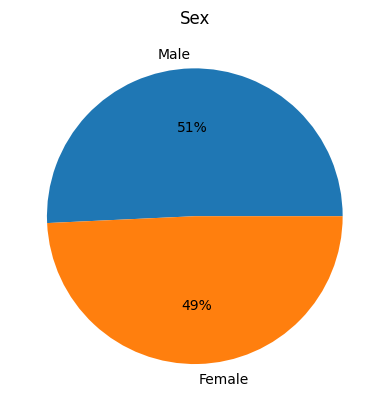

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data['Sex'].value_counts()
total_count = sex_counts.sum()
percentages = (sex_counts / total_count * 100).round()
def format_pct(pct):
    return '{:.0f}%'.format(pct)
plt.pie(sex_counts, labels=cleaned_data['Sex'].unique(), autopct=format_pct)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_data.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)'].reset_index()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    drug_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    quartiles = drug_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"Outliers for {drug}: {outliers}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


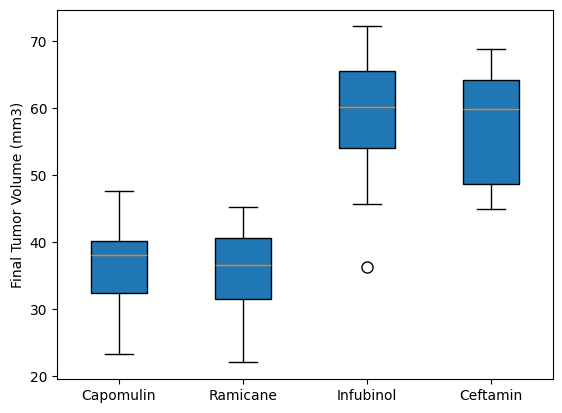

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatments]

# Create the box plot with customizations
box_plot = plt.boxplot(data, labels=treatments, patch_artist=True)

# Change the color and style of potential outliers
for flier in box_plot['fliers']:
    flier.set(marker='o', color='red', markersize=8)  # Change marker to circle, color to red, and size

# Add the y-label
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

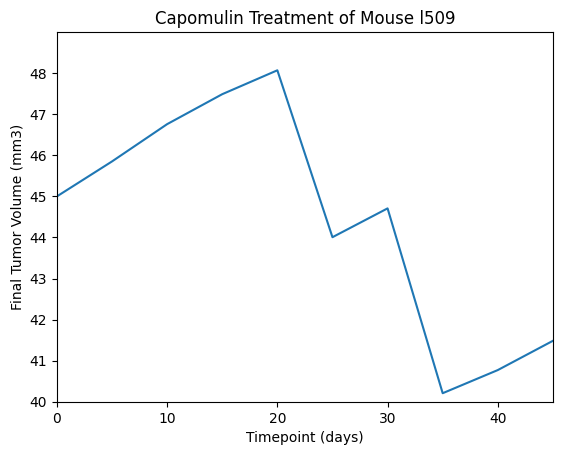

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509']
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])

# Adjust the y-axis tickers to be from 40 to 48
plt.ylim(40, 49)
plt.yticks(range(40, 49, 1))

# Adjust the x-axis tickers to be from 0 to 40
plt.xlim(0, 45)
plt.xticks(range(0, 45, 10))

# Add the y-label
plt.ylabel('Final Tumor Volume (mm3)')

# Add the x-label 
plt.xlabel('Timepoint (days)')

# Add the title 
plt.title('Capomulin Treatment of Mouse l509')

plt.show()


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin)')

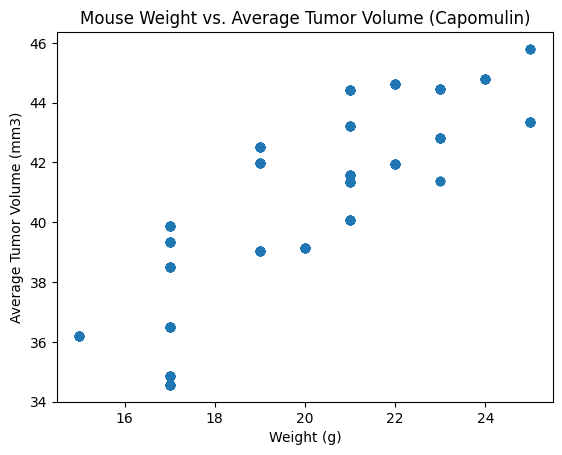

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID', suffixes=('', '_avg'))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

## Correlation and Regression

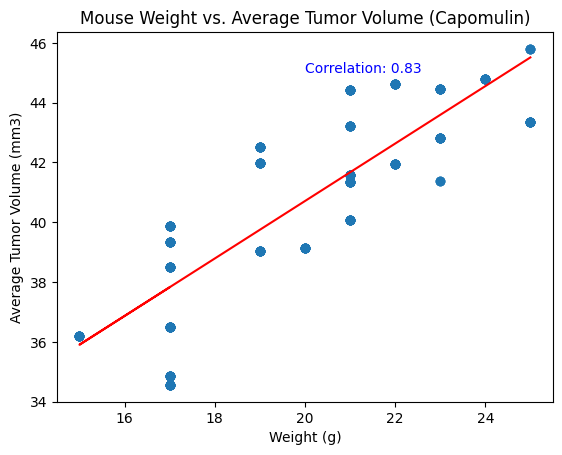

In [94]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Assuming 'capomulin_data' contains the Capomulin treatment data

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume back to the original data
merged_data = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID', suffixes=('', '_avg'))

# Scatter plot of Weight vs. Average Tumor Volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)_avg'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'])

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

# Display the correlation coefficient on the plot
plt.text(20, 45, f'Correlation: {correlation:.2f}', color='blue')

plt.show()